In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# https://machinelearningmastery.com/develop-your-first-neural-network-with-pytorch-step-by-step/
# https://www.datacamp.com/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch

In [14]:
# neural net definition
# simple net: 1 hidden layer
# Define a simple net model using nn.Module
class Net_1_hidden_layer(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation_func='ReLU'):
        super(Net_1_hidden_layer, self).__init__()
        torch.manual_seed(0)
        self.fc1 = nn.Linear(input_size, hidden_size)  # Fully connected layer 1
        self.fc2 = nn.Linear(hidden_size, output_size) # Fully connected layer 2
        if activation_func=='ReLU':
          self.func = nn.ReLU()                         # ReLU activation
        elif activation_func=='sigmoid':
          self.func = nn.Sigmoid()                      # Sigmoid activation
        elif activation_func=='tanh':
          self.func = nn.Tanh()                         # hyperbolic tangent
        else:
          raise NameError('activation_func function ' + activation_func + ' not supported yet!')

    def forward(self, x):
        out = self.fc1(x)
        out = self.func(out) # activation function
        out = self.fc2(out)
        return out

input_size = 1
hidden_size = 100
output_size = 1
func = 'ReLU'
model = Net_1_hidden_layer(input_size, hidden_size, output_size,activation_func=func)


In [15]:
# training set and loss function defintion
number_samples = 10 # training set
xa = -5; xb = 5;
torch.manual_seed(0)
x_true = xa + (xb - xa) * torch.rand(number_samples, input_size) # uniform distribution
# outra forma de gerar uniform: x_true = torch.FloatTensor(number_samples, input_dim).uniform_(xa, xb) #https://stackoverflow.com/questions/44328530/how-to-get-a-uniform-distribution-in-a-range-r1-r2-in-pytorch
y_true = x_true**2 + 1
#plt.plot(x_true,y_true,'*')

# training settings
learning_rate = 0.01
number_epochs = 4000

# loss function definition
# Loss function for regression: Mean Squared Error
#https://docs.pytorch.org/docs/stable/generated/torch.nn.MSELoss.html
loss_function = nn.MSELoss() # L2 norm
train_loss_sum_vec = [] # lista para guardar os valores da loss; usado depois para visualizar a evolução da loss com número de epochs

# Optimizer
# https://docs.pytorch.org/docs/stable/optim.html#module-torch.optim
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [16]:
# training process (running over epochs)
for epoch in range(number_epochs):
  # Set model to training mode https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.train
  model.train()  # é útil para algumas arquiteturas de rede
  # forward pass (passando por todos os samples)
  # as duas formas abaixo funcionam, mas parece que a segunda, i.e., model(x_true), é a forma preferível
  # https://medium.com/jun94-devpblog/pytorch-2-a043b216fb29
  # https://discuss.pytorch.org/t/any-different-between-model-input-and-model-forward-input/3690
  # y_pred = model.forward(x_true) # chama apenas o forward da classe
  y_pred = model(x_true) # chama o forward da classe e mais algumas funções que podem ser importantes durante essa chamada (forma preferível)
  # loss functon evaluation
  loss = loss_function(y_pred,y_true) # loss deve ser um escalar
  train_loss_sum = loss.item()
  # backward
  optimizer.zero_grad() # zera os gradientes https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch
  loss.backward()  # cálculo do gradiente (backpropagation)
  optimizer.step() # pesos e bias são ajustados
  train_loss_sum_vec.append(train_loss_sum) # armazena numa lista para pós-processamento

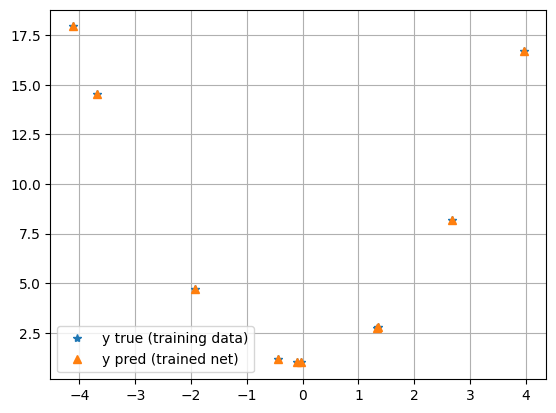

In [17]:
# post-processing
y_pred = model.forward(x_true) # rede já deve estar treinada e pronta para aplicação
plt.plot(x_true,y_true,"*",label='y true (training data)')
plt.plot(x_true,y_pred.detach().numpy(),"^",label='y pred (trained net)')
plt.legend()
plt.grid(True)
plt.show()

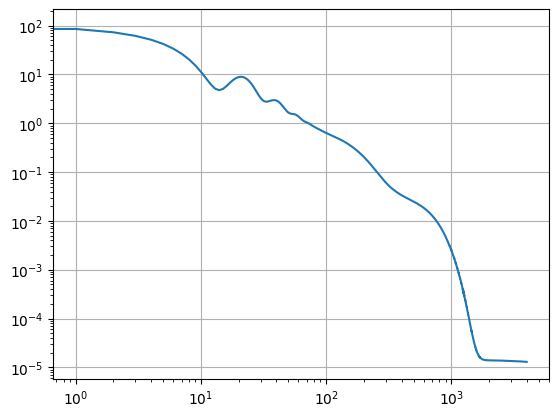

In [18]:
plt.plot(range(number_epochs),train_loss_sum_vec)
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()

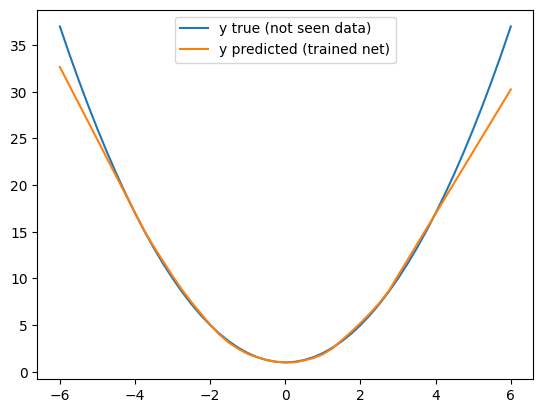

In [19]:
# applying the trained net for not seen data
step = 0.25
xa = -6; xb = 6+step; # increase a little the trainning domain
x_true = torch.tensor(np.arange(xa, xb, step),dtype=torch.float32).unsqueeze(1)
y_true = x_true**2 + 1 # funcao verdadeira
y_pred = model(x_true)

plt.plot(x_true,y_true,"-",label='y true (not seen data)')
plt.plot(x_true,y_pred.detach().numpy(),"-",label='y predicted (trained net)')
plt.legend()
plt.show()